<a href="https://colab.research.google.com/github/ElanDeyan/a3-cg-rv/blob/main/A3_CG_E_RV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A3 da UC de computação gráfica e realidade virtual

## Tema do projeto

Com base no conteúdo da UC Computação Gráfica e Realidade Virtual,  desenvolver um sistema ou programa que utilize algumas das técnicas englobadas pela UC.

Reconhecimento de formas: usar técnicas de PDI e CG e reconhecimento de padrões para identificar objetos em imagens.

## Especificação enviada ao professor no formulário

***Product Counter* - Reconhecimento de formas**

*Uma solução para contar a quantidade de objetos numa esteira, dada uma imagem com uma visão perpendicular à esteira.*


## Objetivos específicos

* Apresentar uma solução de um problema de computação gráfica na forma de um sistema de programação.
* Elaborar um relatório final apresentando os tópicos geradores teóricos para desenvolver a aplicação e o código desenvolvido.
* Depositar todo o material e desenvolvimento do código do projeto no GitHub.

## Cronograma

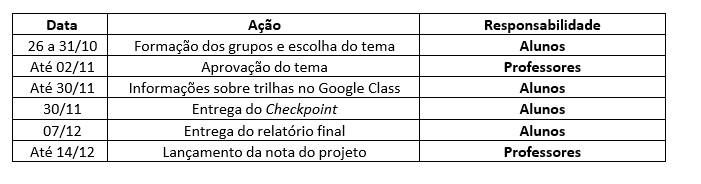

## Critérios de Avaliação

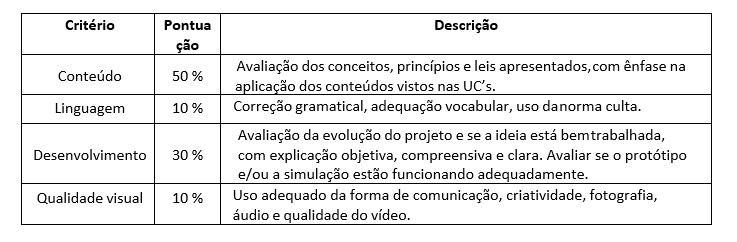

## Sobre o relatório final

O relatório final, link do GitHub e certificados das trilhas devem ser entregue
no GOOGLE CLASS na data estabelecida no cronograma abaixo.

O relatório final deve seguir a estrutura:

Relatório Final (estrutura básica): Introdução; Projeto; Resultados; Conclusão.
[Link do Google Class](https://classroom.google.com/c/NjM0Mjc3NzQzMzk2?cjc=jkfwxr5)

## Contador de objetos

In [ ]:
!pip install pillow

In [ ]:
# Permitir o envio de imagens do usuário
from google.colab import files
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
# Receber arquivo do usuário
uploaded = files.upload()

# Obter o nome do arquivo
file_name = list(uploaded.keys())[0]

# Armazena em uma variável o diretório do arquivo + seu nome
file_directory = './' + file_name

# Usa a biblioteca opencv para salvar a imagem numa variável
original_image = cv2.imread(file_directory)

KeyboardInterrupt: ignored

In [ ]:
# Verificar se a imagem foi carregada corretamente
if original_image is not None:
    # Exibir a imagem (isso abrirá uma janela com a imagem)
    Altura, Largura, Canal = original_image.shape
    print(f"Largura: {Largura}, Altura: {Altura}, Canais: {Canal}")

    cv2_imshow(original_image)
else:
    print("A imagem não pôde ser carregada.")

In [ ]:
# Converter a imagem para escala de cinza
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)

# Aplicar um desfoque para ajudar na detecção de contornos
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1)

In [ ]:
# Filtra contornos
Altura, Largura, _ = original_image.shape
AREA_LIMIT = int(input("Coloque uma área limite: "))

In [ ]:
# Adaptive threshold

threshold = cv2.adaptiveThreshold(blurred_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                  cv2.THRESH_BINARY_INV, 11, 3)

cv2_imshow(threshold)

kernel = np.ones((1, 1), np.uint8)

closed = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel)

cv2_imshow(closed)

# Encontrar contornos na imagem com tamanho mínimo ajustado
contours, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filtra contornos que tenham uma area maior que AREA_LIMIT
filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > AREA_LIMIT and cv2.contourArea(cnt) < (Altura * Largura)]

# Criar uma cópia da imagem original para desenhar os contornos
marked_image = original_image.copy()

for contour in filtered_contours:
  # Obter um retângulo delimitador ao redor do contorno
  x, y, w, h = cv2.boundingRect(contour)

  # Desenhar um retângulo ao redor do objeto
  cv2.rectangle(marked_image, (x, y), (x + w, y + h), (0, 255, 0), 1)

object_count = len(filtered_contours)

print(f'Número de objetos encontrados: {object_count}')
cv2_imshow(marked_image)

In [ ]:
f"Objetos encontrados com Adaptive threshold: {object_count}"